In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.concat([pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')], sort = False)
df = df.dropna()
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Kiểm tra số phần tử trong các cột định tính
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count}")

  Gender: 2
  Customer Type: 2
  Type of Travel: 2
  Class: 3
  satisfaction: 2


In [5]:
# In ra các giá trị trong các cột định tính
for index,col in enumerate(categorical_columns):
    print(index+1,'.',col,':', df[col].unique())
    print('-' * 100)

1 . Gender : ['Male' 'Female']
----------------------------------------------------------------------------------------------------
2 . Customer Type : ['Loyal Customer' 'disloyal Customer']
----------------------------------------------------------------------------------------------------
3 . Type of Travel : ['Personal Travel' 'Business travel']
----------------------------------------------------------------------------------------------------
4 . Class : ['Eco Plus' 'Business' 'Eco']
----------------------------------------------------------------------------------------------------
5 . satisfaction : ['neutral or dissatisfied' 'satisfied']
----------------------------------------------------------------------------------------------------


In [6]:
label_encoder = LabelEncoder()
for col in ['Gender','Customer Type', 'Type of Travel', 'satisfaction']:
    df[col] = label_encoder.fit_transform(df[col])
class_map = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
df['Class'] = df['Class'].map(class_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  int64  
 1   Customer Type                      129487 non-null  int64  
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  int64  
 4   Class                              129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 non

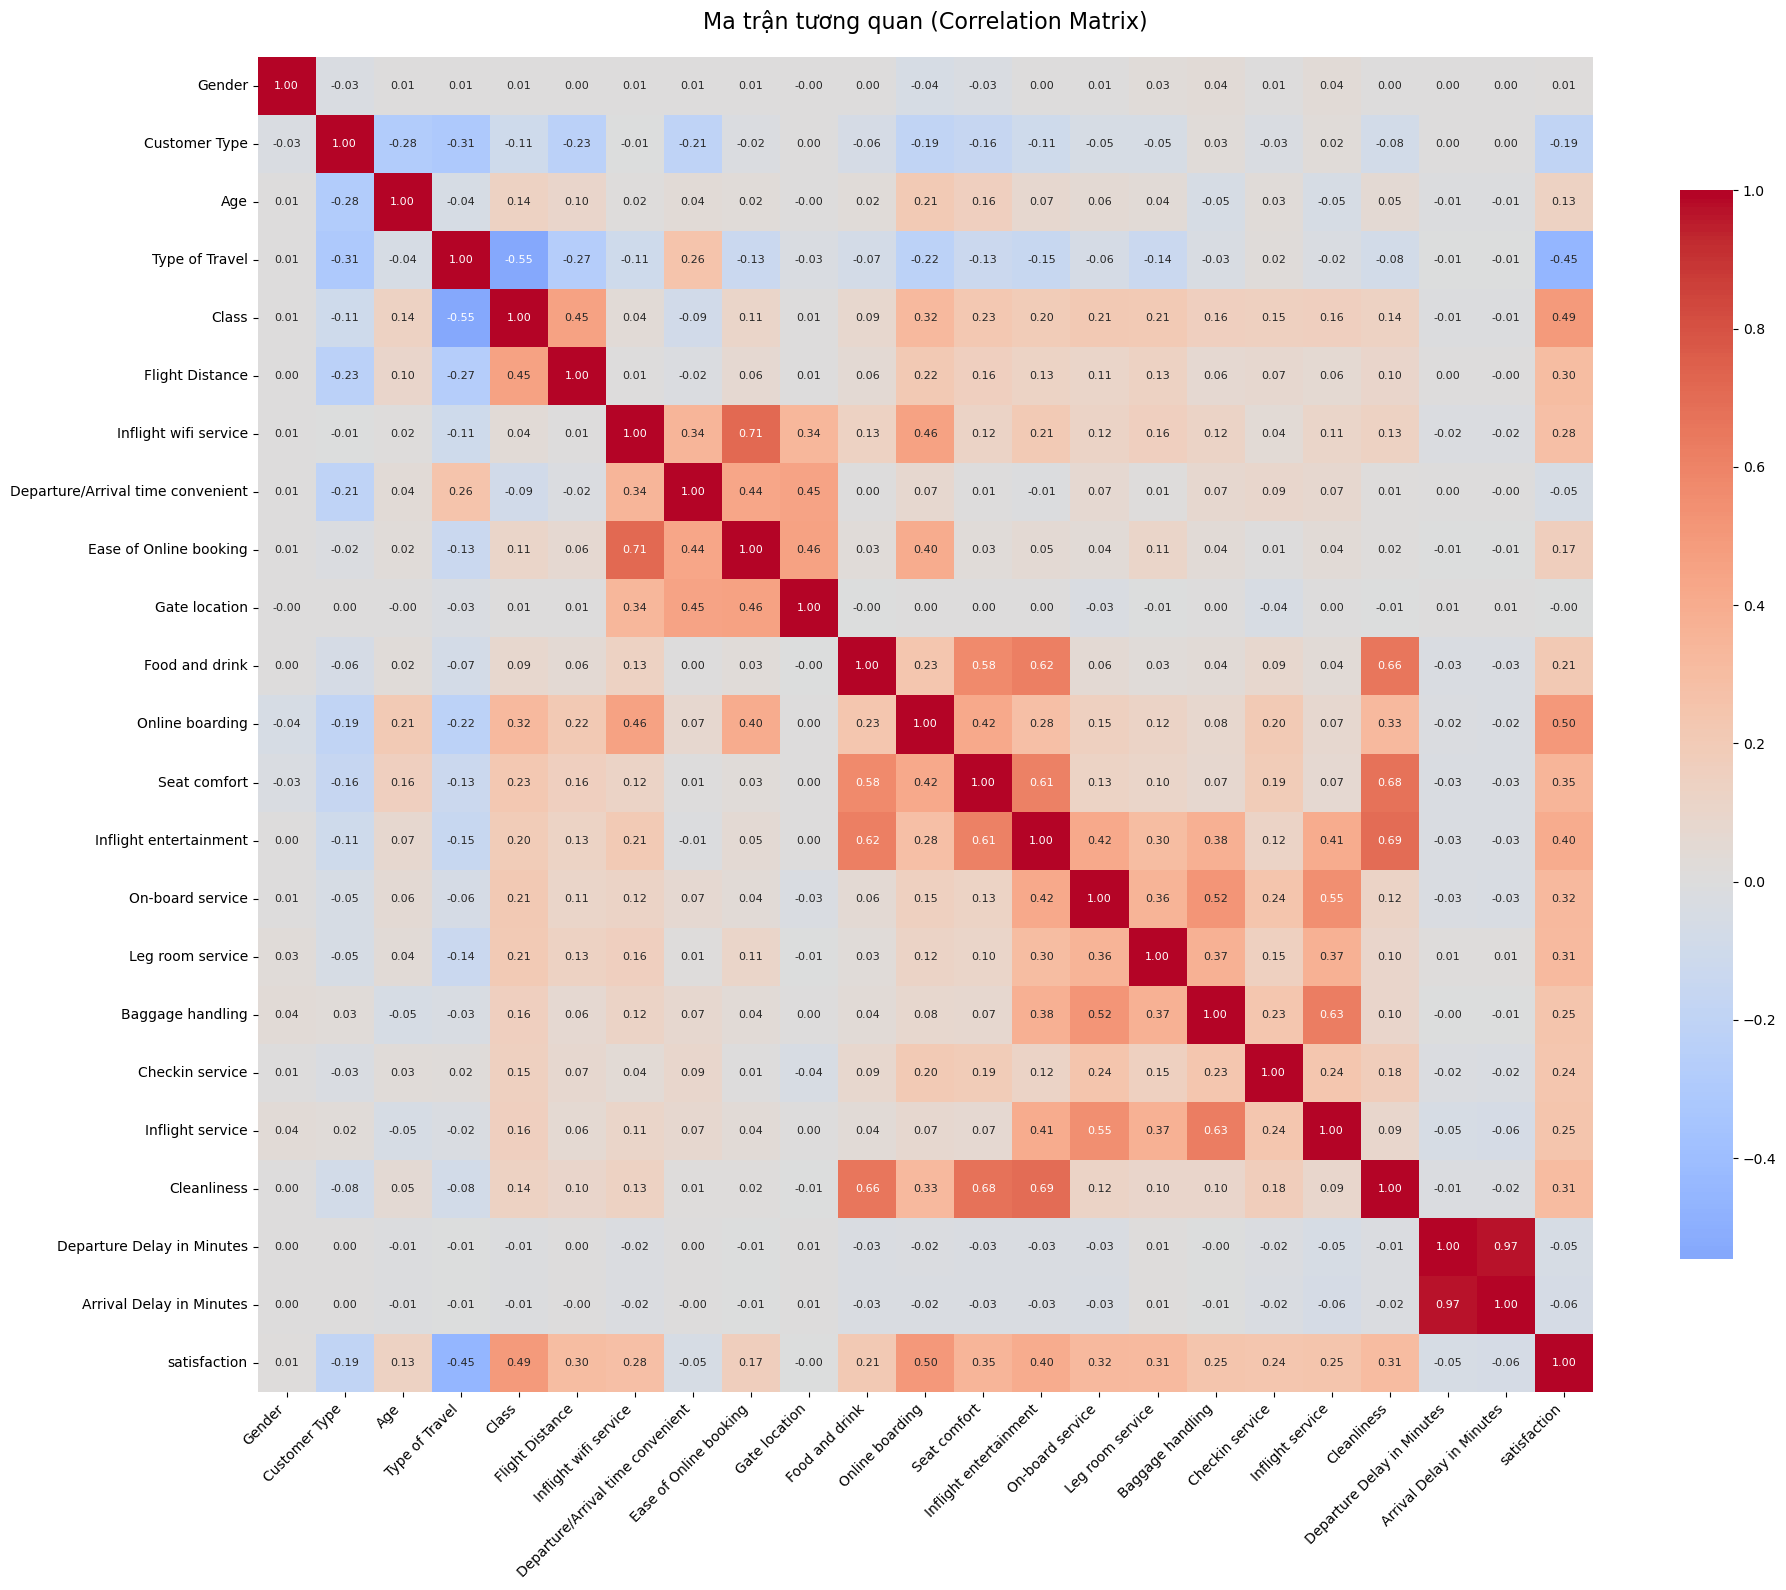

In [7]:
# Ma trận tương quan 

plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()

# Sử dụng seaborn heatmap để hiển thị đẹp hơn
sns.heatmap(correlation_matrix, 
            annot=True,          # Hiển thị số
            cmap='coolwarm',     # Bảng màu đẹp
            center=0,            # Căn giữa tại 0
            square=True,         # Ô vuông
            fmt='.2f',           # Định dạng số (2 chữ số thập phân)
            annot_kws={'size': 8}, # Kích thước chữ
            cbar_kws={'shrink': 0.8})

plt.title('Ma trận tương quan (Correlation Matrix)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# BƯỚC 1: CHUẨN BỊ DỮ LIỆU CHO FACTOR ANALYSIS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

print("=== CHUẨN BỊ DỮ LIỆU ===")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Các biến trong phân tích:")
print(df.columns.tolist())

# Kiểm tra missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() > 0:
    print("Xử lý missing values...")
    df = df.dropna()
    print(f"Kích thước sau khi xử lý: {df.shape}")

# Chuẩn hóa dữ liệu (quan trọng cho Factor Analysis)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\n✅ Đã chuẩn hóa dữ liệu (mean=0, std=1)")

=== CHUẨN BỊ DỮ LIỆU ===
Kích thước dữ liệu: (129487, 23)
Các biến trong phân tích:
['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

Missing values: 0

✅ Đã chuẩn hóa dữ liệu (mean=0, std=1)


In [9]:
# BƯỚC 2: KIỂM TRA ĐIỀU KIỆN CHO FACTOR ANALYSIS
print("=== KIỂM TRA ĐIỀU KIỆN ===")

# 1. Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)
print(f"1. Bartlett's Test of Sphericity:")
print(f"   Chi-square: {chi_square_value:.2f}")
print(f"   p-value: {p_value:.2e}")
if p_value < 0.05:
    print("   ✅ Significant (p < 0.05) - Phù hợp cho Factor Analysis")
else:
    print("   ❌ Not significant (p >= 0.05) - Không phù hợp")

# 2. Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"\n2. Kaiser-Meyer-Olkin (KMO) Test:")
print(f"   KMO Overall: {kmo_model:.3f}")
if kmo_model >= 0.8:
    print("   ✅ Excellent (>= 0.8)")
elif kmo_model >= 0.7:
    print("   ✅ Good (>= 0.7)")
elif kmo_model >= 0.6:
    print("   ⚠️ Mediocre (>= 0.6)")
elif kmo_model >= 0.5:
    print("   ⚠️ Miserable (>= 0.5)")
else:
    print("   ❌ Unacceptable (< 0.5)")

print(f"\n3. Kích thước mẫu:")
print(f"   N = {len(df_scaled):,} observations")
print(f"   Variables = {len(df_scaled.columns)}")
print(f"   Ratio = {len(df_scaled)/len(df_scaled.columns):.1f}:1")
if len(df_scaled)/len(df_scaled.columns) >= 10:
    print("   ✅ Good sample size (>= 10:1 ratio)")
else:
    print("   ⚠️ Consider larger sample size")

=== KIỂM TRA ĐIỀU KIỆN ===
1. Bartlett's Test of Sphericity:
   Chi-square: 1403504.68
   p-value: 0.00e+00
   ✅ Significant (p < 0.05) - Phù hợp cho Factor Analysis

2. Kaiser-Meyer-Olkin (KMO) Test:
   KMO Overall: 0.740
   ✅ Good (>= 0.7)

3. Kích thước mẫu:
   N = 129,487 observations
   Variables = 23
   Ratio = 5629.9:1
   ✅ Good sample size (>= 10:1 ratio)


=== XÁC ĐỊNH SỐ LƯỢNG FACTOR ===
Eigenvalues:
  Factor 1: 4.530
  Factor 2: 2.383
  Factor 3: 2.206
  Factor 4: 1.980
  Factor 5: 1.924
  Factor 6: 1.503
  Factor 7: 1.024
  Factor 8: 0.975
  Factor 9: 0.933
  Factor 10: 0.821
  Factor 11: 0.690
  Factor 12: 0.578
  Factor 13: 0.481
  Factor 14: 0.469
  Factor 15: 0.430
  Factor 16: 0.400
  Factor 17: 0.366
  Factor 18: 0.315
  Factor 19: 0.292
  Factor 20: 0.262
  Factor 21: 0.228
  Factor 22: 0.174
  Factor 23: 0.035

Kaiser Criterion (eigenvalue > 1): 7 factors


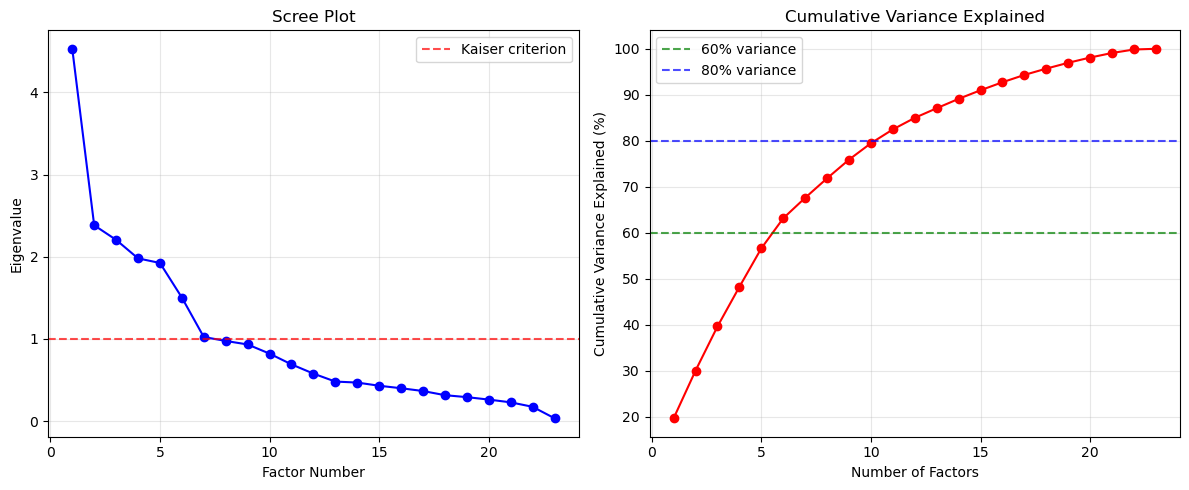

Gợi ý số lượng factor:
  - Kaiser criterion: 7 factors
  - 60% variance: 6 factors (63.2%)
  - 80% variance: 11 factors (82.5%)


In [10]:
# BƯỚC 3: XÁC ĐỊNH SỐ LƯỢNG FACTOR TỐI ƯU
print("=== XÁC ĐỊNH SỐ LƯỢNG FACTOR ===")

# Tạo FactorAnalyzer để kiểm tra eigenvalues
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)

# Lấy eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

print("Eigenvalues:")
for i, ev in enumerate(eigenvalues):
    print(f"  Factor {i+1}: {ev:.3f}")

# Kaiser criterion (eigenvalue > 1)
n_factors_kaiser = sum(eigenvalues > 1)
print(f"\nKaiser Criterion (eigenvalue > 1): {n_factors_kaiser} factors")

# Scree plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Kaiser criterion')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.axhline(y=60, color='g', linestyle='--', alpha=0.7, label='60% variance')
plt.axhline(y=80, color='b', linestyle='--', alpha=0.7, label='80% variance')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gợi ý số factor
variance_60 = next((i for i, v in enumerate(cumulative_variance) if v >= 60), len(cumulative_variance))
variance_80 = next((i for i, v in enumerate(cumulative_variance) if v >= 80), len(cumulative_variance))

print(f"Gợi ý số lượng factor:")
print(f"  - Kaiser criterion: {n_factors_kaiser} factors")
print(f"  - 60% variance: {variance_60 + 1} factors ({cumulative_variance[variance_60]:.1f}%)")
print(f"  - 80% variance: {variance_80 + 1} factors ({cumulative_variance[variance_80]:.1f}%)")

In [11]:
# BƯỚC 4: THỰC HIỆN FACTOR ANALYSIS
# Chọn số factor dựa trên phân tích trên (ví dụ: 5 factors)
n_factors = 5  # Có thể điều chỉnh dựa trên kết quả ở trên

print(f"=== FACTOR ANALYSIS VỚI {n_factors} FACTORS ===")

# Factor Analysis với rotation
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_scaled)

# Lấy factor loadings
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, 
                          index=df.columns, 
                          columns=[f'Factor{i+1}' for i in range(n_factors)])

print("Factor Loadings:")
print(loadings_df.round(3))

# Tính variance explained
variance_explained = fa.get_factor_variance()
print(f"\nVariance Explained:")
print(f"  - Sum of Squares Loadings: {variance_explained[0]}")
print(f"  - Proportional Variance: {variance_explained[1]}")
print(f"  - Cumulative Variance: {variance_explained[2]}")

total_variance = sum(variance_explained[2])
print(f"  - Total Variance Explained: {total_variance:.1%}")

# Communalities (h²)
communalities = fa.get_communalities()
communalities_df = pd.DataFrame({
    'Variable': df.columns,
    'Communality': communalities
}).sort_values('Communality', ascending=False)

print(f"\nCommunalities (h²):")
print(communalities_df.round(3).to_string(index=False))

=== FACTOR ANALYSIS VỚI 5 FACTORS ===
Factor Loadings:
                                   Factor1  Factor2  Factor3  Factor4  Factor5
Gender                              -0.014    0.044   -0.012    0.002    0.003
Customer Type                       -0.156   -0.005   -0.051   -0.087    0.005
Age                                  0.106   -0.041    0.177    0.036   -0.009
Type of Travel                       0.002   -0.011   -0.662    0.049   -0.013
Class                                0.060    0.160    0.747   -0.044   -0.002
Flight Distance                      0.066    0.066    0.456   -0.013    0.006
Inflight wifi service                0.149    0.112    0.157    0.735   -0.011
Departure/Arrival time convenient    0.032    0.082   -0.204    0.578   -0.000
Ease of Online booking              -0.000    0.006    0.198    0.885   -0.002
Gate location                       -0.018   -0.020   -0.039    0.521    0.008
Food and drink                       0.754   -0.010    0.036   -0.000   -0.0

=== TRỰC QUAN HÓA FACTOR LOADINGS ===


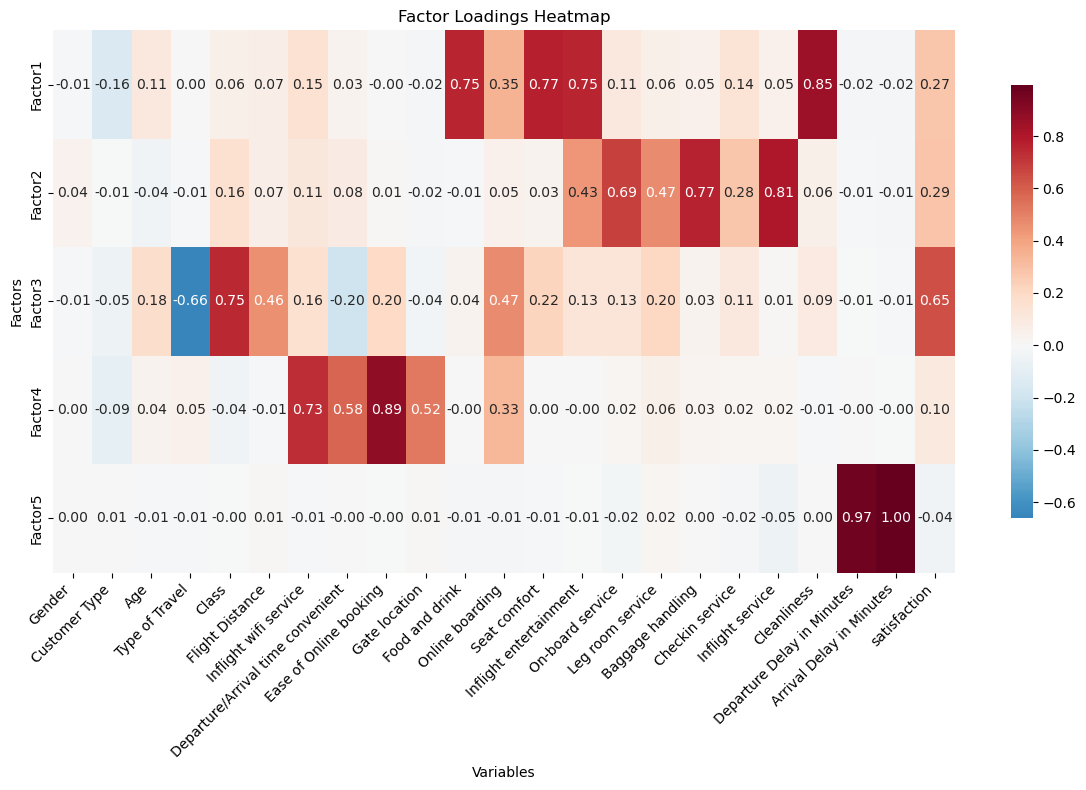

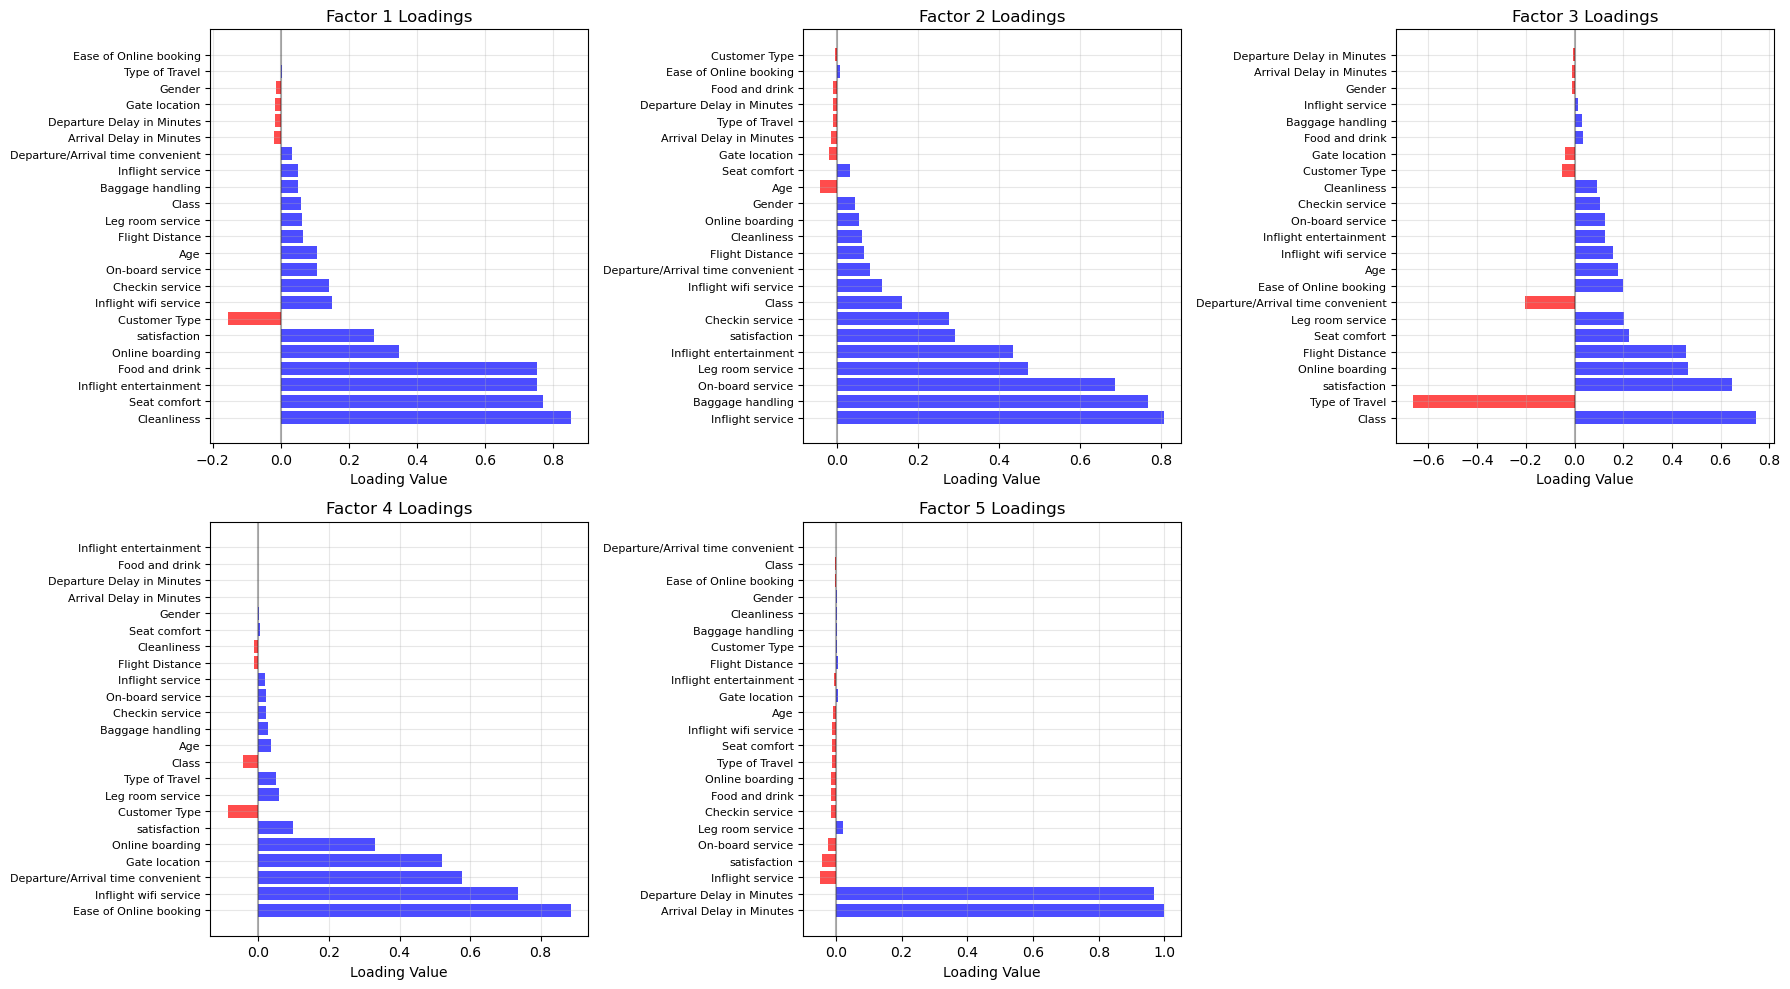

In [12]:
# BƯỚC 5: TRỰC QUAN HÓA FACTOR LOADINGS
print("=== TRỰC QUAN HÓA FACTOR LOADINGS ===")

# Heatmap của factor loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.T, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Factor Loadings Heatmap')
plt.xlabel('Variables')
plt.ylabel('Factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Biểu đồ cột cho từng factor
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(n_factors):
    factor_loadings = loadings_df[f'Factor{i+1}'].sort_values(key=abs, ascending=False)
    
    ax = axes[i]
    colors = ['red' if x < 0 else 'blue' for x in factor_loadings.values]
    bars = ax.barh(range(len(factor_loadings)), factor_loadings.values, color=colors, alpha=0.7)
    
    ax.set_yticks(range(len(factor_loadings)))
    ax.set_yticklabels(factor_loadings.index, fontsize=8)
    ax.set_xlabel('Loading Value')
    ax.set_title(f'Factor {i+1} Loadings')
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)

# Ẩn subplot thừa
if n_factors < len(axes):
    axes[n_factors].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
# BƯỚC 6: GIẢI THÍCH VÀ ĐẶT TÊN CÁC FACTOR
print("=== GIẢI THÍCH CÁC FACTOR ===")

# Tìm các biến có loading cao nhất cho mỗi factor
factor_interpretations = {}

for i in range(n_factors):
    factor_name = f'Factor{i+1}'
    
    # Lấy các biến có |loading| > 0.5 (threshold thường dùng)
    high_loadings = loadings_df[factor_name][abs(loadings_df[factor_name]) > 0.5].sort_values(key=abs, ascending=False)
    
    print(f"\n{factor_name}:")
    print(f"  Variance explained: {variance_explained[1][i]:.1%}")
    
    if len(high_loadings) > 0:
        print(f"  Biến có loading cao (|loading| > 0.5):")
        for var, loading in high_loadings.items():
            direction = "positive" if loading > 0 else "negative"
            print(f"    - {var}: {loading:.3f} ({direction})")
    else:
        # Nếu không có biến nào > 0.5, hiển thị top 3
        top_loadings = loadings_df[factor_name].abs().nlargest(3)
        print(f"  Top 3 biến có loading cao nhất:")
        for var in top_loadings.index:
            loading = loadings_df.loc[var, factor_name]
            direction = "positive" if loading > 0 else "negative"
            print(f"    - {var}: {loading:.3f} ({direction})")

# Tạo factor scores
factor_scores = fa.transform(df_scaled)
factor_scores_df = pd.DataFrame(factor_scores, 
                               columns=[f'Factor{i+1}' for i in range(n_factors)])

print(f"\n=== FACTOR SCORES ===")
print(f"Đã tạo factor scores cho {len(factor_scores_df)} observations")
print(f"Thống kê mô tả factor scores:")
print(factor_scores_df.describe().round(3))

=== GIẢI THÍCH CÁC FACTOR ===

Factor1:
  Variance explained: 12.0%
  Biến có loading cao (|loading| > 0.5):
    - Cleanliness: 0.852 (positive)
    - Seat comfort: 0.772 (positive)
    - Inflight entertainment: 0.754 (positive)
    - Food and drink: 0.754 (positive)

Factor2:
  Variance explained: 10.2%
  Biến có loading cao (|loading| > 0.5):
    - Inflight service: 0.805 (positive)
    - Baggage handling: 0.768 (positive)
    - On-board service: 0.685 (positive)

Factor3:
  Variance explained: 9.2%
  Biến có loading cao (|loading| > 0.5):
    - Class: 0.747 (positive)
    - Type of Travel: -0.662 (negative)
    - satisfaction: 0.645 (positive)

Factor4:
  Variance explained: 9.0%
  Biến có loading cao (|loading| > 0.5):
    - Ease of Online booking: 0.885 (positive)
    - Inflight wifi service: 0.735 (positive)
    - Departure/Arrival time convenient: 0.578 (positive)
    - Gate location: 0.521 (positive)

Factor5:
  Variance explained: 8.4%
  Biến có loading cao (|loading| > 0.5):


=== ỨNG DỤNG FACTOR ANALYSIS ===


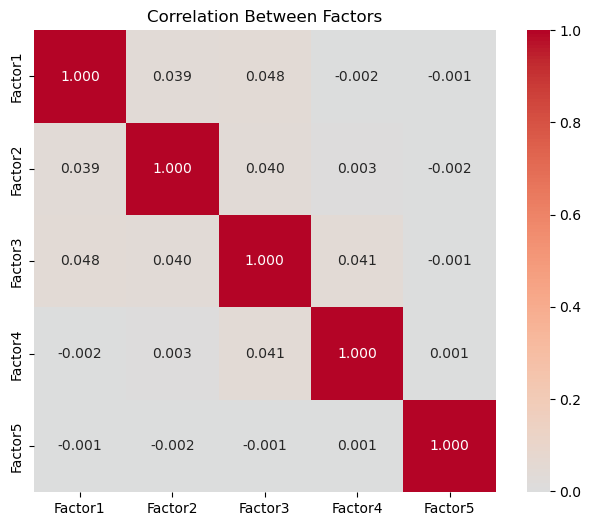

Factor correlation matrix:
         Factor1  Factor2  Factor3  Factor4  Factor5
Factor1    1.000    0.039    0.048   -0.002   -0.001
Factor2    0.039    1.000    0.040    0.003   -0.002
Factor3    0.048    0.040    1.000    0.041   -0.001
Factor4   -0.002    0.003    0.041    1.000    0.001
Factor5   -0.001   -0.002   -0.001    0.001    1.000


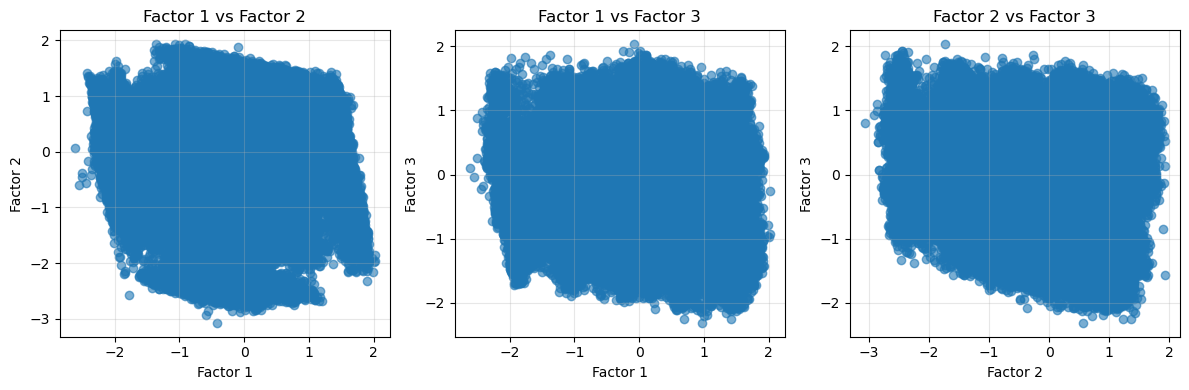


=== KẾT LUẬN ===
✅ Đã hoàn thành Factor Analysis với 5 factors
✅ Tổng variance explained: 154.9%
✅ Factor scores đã được tạo và có thể sử dụng cho:
   - Clustering analysis
   - Regression analysis
   - Data reduction
   - Pattern identification

💾 Có thể lưu kết quả:
   - Factor loadings: loadings_df
   - Factor scores: factor_scores_df
   - Communalities: communalities_df


In [14]:
# BƯỚC 7: ỨNG DỤNG VÀ KẾT LUẬN
print("=== ỨNG DỤNG FACTOR ANALYSIS ===")

# Correlation giữa các factors
factor_corr = factor_scores_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(factor_corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f')
plt.title('Correlation Between Factors')
plt.show()

print("Factor correlation matrix:")
print(factor_corr.round(3))

# Scatter plot giữa các factors quan trọng
if n_factors >= 2:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(factor_scores_df['Factor1'], factor_scores_df['Factor2'], alpha=0.6)
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.title('Factor 1 vs Factor 2')
    plt.grid(True, alpha=0.3)
    
    if n_factors >= 3:
        plt.subplot(1, 3, 2)
        plt.scatter(factor_scores_df['Factor1'], factor_scores_df['Factor3'], alpha=0.6)
        plt.xlabel('Factor 1')
        plt.ylabel('Factor 3')
        plt.title('Factor 1 vs Factor 3')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 3, 3)
        plt.scatter(factor_scores_df['Factor2'], factor_scores_df['Factor3'], alpha=0.6)
        plt.xlabel('Factor 2')
        plt.ylabel('Factor 3')
        plt.title('Factor 2 vs Factor 3')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print(f"\n=== KẾT LUẬN ===")
print(f"✅ Đã hoàn thành Factor Analysis với {n_factors} factors")
print(f"✅ Tổng variance explained: {total_variance:.1%}")
print(f"✅ Factor scores đã được tạo và có thể sử dụng cho:")
print(f"   - Clustering analysis")
print(f"   - Regression analysis")
print(f"   - Data reduction")
print(f"   - Pattern identification")

# Lưu kết quả (optional)
print(f"\n💾 Có thể lưu kết quả:")
print(f"   - Factor loadings: loadings_df")
print(f"   - Factor scores: factor_scores_df")
print(f"   - Communalities: communalities_df")

## Hướng dẫn cài đặt thư viện

Nếu bạn chưa có thư viện `factor_analyzer`, hãy cài đặt:

```bash
pip install factor_analyzer
```

## Các bước Factor Analysis đã thực hiện:

1. **Chuẩn bị dữ liệu**: Chuẩn hóa dữ liệu (StandardScaler)
2. **Kiểm tra điều kiện**: Bartlett's test, KMO test
3. **Xác định số factor**: Scree plot, Kaiser criterion
4. **Thực hiện FA**: Varimax rotation, factor loadings
5. **Trực quan hóa**: Heatmap, bar charts
6. **Giải thích factors**: Đặt tên và ý nghĩa
7. **Ứng dụng**: Factor scores, correlations

## Lưu ý quan trọng:

- **Factor loadings > |0.5|**: Có ý nghĩa thống kê
- **Communalities > 0.5**: Biến được giải thích tốt
- **KMO > 0.7**: Phù hợp cho Factor Analysis
- **Total variance > 60%**: Kết quả chấp nhận được